In [22]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from datasets import *
from decision_tree import *
from visual_utils import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


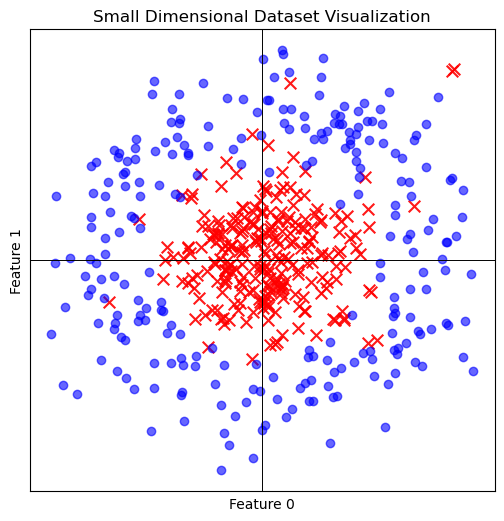

In [23]:
dataset_dict = generate_small_dataset()
visualize_small_dataset(dataset_dict["data"], dataset_dict["labels"])

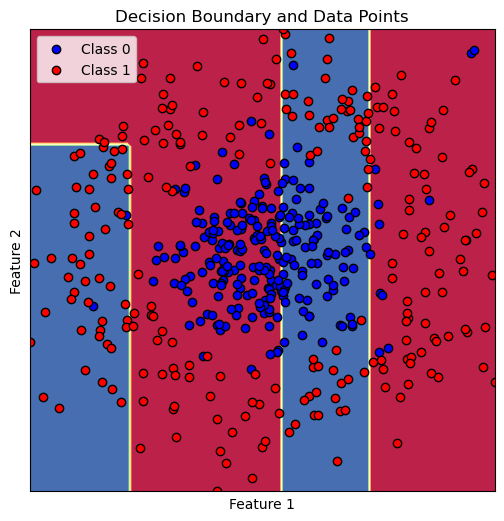

accuracy:  0.45


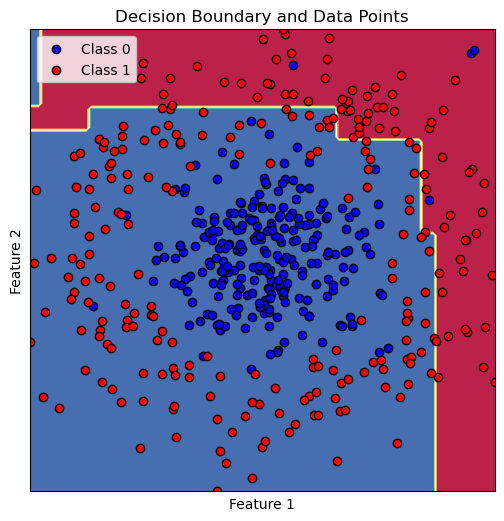

accuracy:  0.636


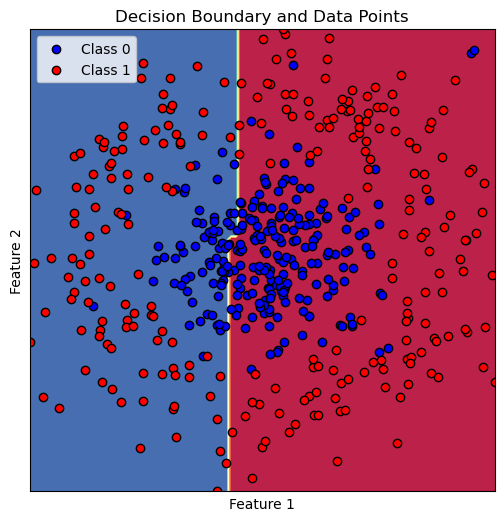

accuracy:  0.434


In [30]:
tree = Tree(
    feature_bounds=dataset_dict["feature_bounds"], generation_type="basic"
)
visualise_tree_decision( tree, dataset_dict)
print("accuracy: ",tree.calculate_accuracy(dataset_dict))

tree2 = Tree(feature_bounds=dataset_dict["feature_bounds"], generation_type="coinflip",p_add=0.70)
visualise_tree_decision( tree2, dataset_dict)
print("accuracy: ",tree2.calculate_accuracy(dataset_dict))

tree3 = Tree(feature_bounds=dataset_dict["feature_bounds"], generation_type="clever")
visualise_tree_decision(tree3, dataset_dict)
print("accuracy: ", tree3.calculate_accuracy(dataset_dict))

In [18]:
print("tree 1:")
tree.print_tree_traverse()
print("\ntree 2:")
tree2.print_tree_traverse()
print("\ntree 3:")
tree3.print_tree_traverse()

tree 1:
f: 0: -1 thr: -0.599 depth: 0 left: f: 0: 1 thr: 0.430 depth: 1 right: f: 1: 1 thr: 0.935 depth: 1
f: 0: 1 thr: 0.430 depth: 1 left: f: 0: -1 thr: -0.057 depth: 2 right: f: 0: 1 thr: -0.093 depth: 2
f: 0: -1 thr: -0.057 depth: 2 left: f: 1: -1 thr: -0.682 depth: 3 right: f: 0: 1 thr: -0.818 depth: 3
f: 1: -1 thr: -0.682 depth: 3 left: leaf: 0 right: leaf: 1
f: 0: 1 thr: -0.818 depth: 3 left: leaf: 0 right: leaf: 1
f: 0: 1 thr: -0.093 depth: 2 left: f: 1: -1 thr: -0.964 depth: 3 right: f: 1: 1 thr: -0.412 depth: 3
f: 1: -1 thr: -0.964 depth: 3 left: leaf: 0 right: leaf: 1
f: 1: 1 thr: -0.412 depth: 3 left: leaf: 0 right: leaf: 1
f: 1: 1 thr: 0.935 depth: 1 left: f: 1: 1 thr: -0.076 depth: 2 right: f: 1: 1 thr: -0.549 depth: 2
f: 1: 1 thr: -0.076 depth: 2 left: f: 1: 1 thr: 0.197 depth: 3 right: f: 1: -1 thr: -0.505 depth: 3
f: 1: 1 thr: 0.197 depth: 3 left: leaf: 0 right: leaf: 1
f: 1: -1 thr: -0.505 depth: 3 left: leaf: 0 right: leaf: 1
f: 1: 1 thr: -0.549 depth: 2 left: f: 0: 

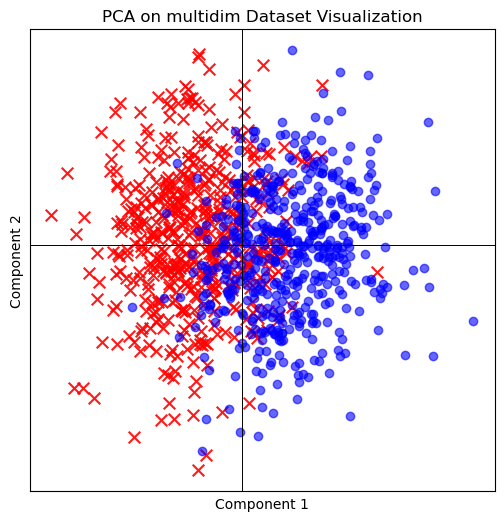

In [19]:
# dataset_dict = generate_small_dataset()
dataset_dict = generate_multidimensional_dataset()
visualize_multidimensional_dataset(dataset_dict["data"], dataset_dict["labels"])

In [21]:
samples = 10_000
dataset_dict = generate_small_dataset()

accs = []
sizes = []
for i in range(samples):
    tree = Tree(
        feature_bounds=dataset_dict["feature_bounds"], generation_type="basic"
    )
    accs.append(tree.calculate_accuracy(dataset_dict))
    sizes.append(tree.size())
print("basic: ", np.mean(np.array(accs)), np.mean(np.array(sizes)))

accs = []
sizes = []
for i in range(samples):
    tree = Tree(
        feature_bounds=dataset_dict["feature_bounds"], generation_type="coinflip",p_add=0.7
    )
    accs.append(tree.calculate_accuracy(dataset_dict))
    sizes.append(tree.size())
print("coinflip: ", np.mean(np.array(accs)), np.mean(np.array(sizes)))

accs = []
sizes = []
for i in range(samples):
    tree = Tree(
        feature_bounds=dataset_dict["feature_bounds"], generation_type="clever"
    )
    accs.append(tree.calculate_accuracy(dataset_dict))
    sizes.append(tree.size())
print("clever: ", np.mean(np.array(accs)), np.mean(np.array(sizes)))

basic:  0.503753 15.0
coinflip:  0.5040554 14.5412
clever:  0.503556 15.0
